In [1]:
import numpy as np
import pandas as pd

In [2]:
seed = 1

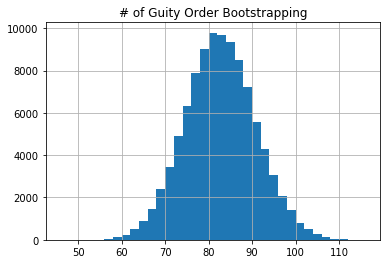

In [59]:
n,p = 411, 0.2
s = np.random.binomial(n,p,100000)
df = pd.DataFrame(s)
df.columns = ['# of Guity Order Bootstrapping']
ax = df.hist(bins=35)

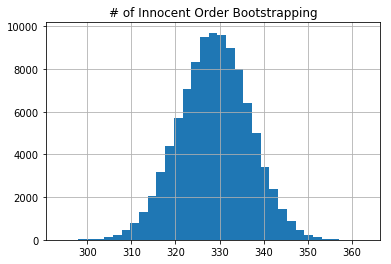

In [60]:
n,p = 411, 0.8
s = np.random.binomial(n,p,100000)
df_1 = pd.DataFrame(s)
df_1.columns = ['# of Innocent Order Bootstrapping']
ax_1 = df_1.hist(bins=35)

In [61]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt

In [63]:
[M,n,N] = [430,87,103]
rv = hypergeom(M,n,N)
x = np.arange(0,n+1)
pmf_black = rv.pmf(x)

In [94]:
pdf = pd.DataFrame(pmf_black)
pdf.columns = ['odds']
pdf['accu_oods'] = (1- pdf['odds'].cumsum())
pdf

,odds,accu_oods
0,1.733511e-12,1.000000e+00
1,6.445641e-11,1.000000e+00
2,1.168206e-09,1.000000e+00
3,1.375727e-08,1.000000e+00
4,1.184027e-07,9.999999e-01
5,7.942164e-07,9.999991e-01
6,4.324067e-06,9.999947e-01
7,1.964962e-05,9.999751e-01
8,7.606305e-05,9.998990e-01
9,2.547314e-04,9.996443e-01


In [81]:
import math
aaa = 430*0.202
test = math.ceil(aaa)
test

87

In [75]:
odds = pd.Series(pmf_black)
odds[87]

4.208663587777398e-75

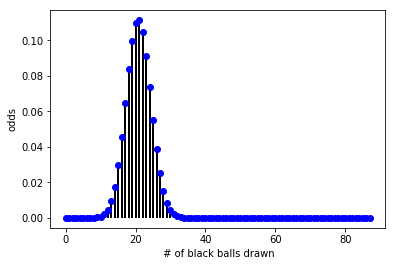

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,pmf_black,'bo')
ax.vlines(x,0,pmf_black,lw=2)
ax.set_xlabel(' # of black balls drawn')
ax.set_ylabel('odds')
plt.show()

In [128]:
def get_odds(m,n):
    M = m
    N = n
    df = []
    for i in [0.1,0.15,0.20,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]:
        n = math.ceil(M * i)
        rv = hypergeom(M,n,N)
        x = np.arange(0,n+1)
        pmf_black = rv.pmf(x)
        pdf = pd.DataFrame(pmf_black)
        pdf.columns = ['odds']
        pdf['accu_odds'] = (1-pdf['odds'].cumsum())
        df.append([i,
                   pdf['accu_odds'][29]])
        odds_table = pd.DataFrame(df,columns=['% of black balls','odds to draw at least 29 black balls'])
    return odds_table

In [115]:
table = get_odds(430,106)

In [116]:
table.abs().round(4)

,% of black balls,odds to draw at least 87 black balls
0,0.202,0.0000
1,0.300,0.0000
2,0.400,0.0000
3,0.500,0.0000
4,0.600,0.0000
5,0.700,0.0004
6,0.800,0.2270
7,0.900,0.9975


In [129]:
table2 = get_odds(774,241)

In [130]:
table2.abs().round(4)

,% of black balls,odds to draw at least 29 black balls
0,0.10,0.0909
1,0.15,0.9352
2,0.20,0.9999
3,0.30,1.0000
4,0.35,1.0000
5,0.40,1.0000
6,0.50,1.0000
7,0.60,1.0000
8,0.70,1.0000
9,0.80,1.0000
